
🎯 Supervised Predictions:
Benign       198
Malicious      7
Name: count, dtype: int64


<ipython-input-5-809a8f7882fd>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="Blues")


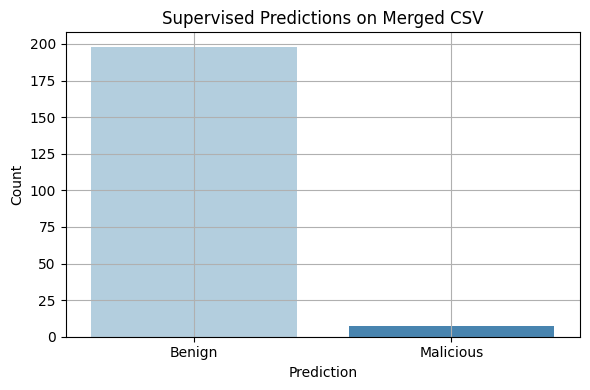

In [5]:
import os
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# === Paths (UPDATE IF NECESSARY) ===
drive_base = "/content/drive/MyDrive"
merged_csv_path = os.path.join(drive_base, "Merged_Testing_Dataset.csv")
supervised_model_path = os.path.join(drive_base, "rf_model.pkl")
supervised_scaler_path = os.path.join(drive_base, "scaler.pkl")

# === Load Supervised Model and Scaler ===
rf_model = joblib.load(supervised_model_path)
rf_scaler = joblib.load(supervised_scaler_path)

# === Shared 13 Features ===
selected_features = [
    'Flow Duration',
    'Total Fwd Packet',
    'Total Bwd packets',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Fwd Packet Length Mean',
    'Bwd Packet Length Mean',
    'Fwd IAT Mean',
    'Bwd IAT Mean',
    'Average Packet Size',
    'Packet Length Std',
    'Subflow Bwd Bytes',
    'FWD Init Win Bytes'
]

# === Load and Preprocess Merged CSV ===
df = pd.read_csv(merged_csv_path)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=selected_features)

# Input only (no labels used)
X = df[selected_features]
X_scaled = rf_scaler.transform(X)
y_pred = rf_model.predict(X_scaled)

# === Display Prediction Counts ===
print("\n🎯 Supervised Predictions:")
pred_counts = pd.Series(y_pred).value_counts().rename(index={0: 'Benign', 1: 'Malicious'})
print(pred_counts)

# === Plot Prediction Counts ===
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, palette="Blues")
plt.title("Supervised Predictions on Merged CSV")
plt.xticks([0, 1], ['Benign', 'Malicious'])
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()
